# #1 Análisis Exploratorio de Datos (EDA)

En este notebook, llevaremos a cabo un análisis exploratorio de datos (*EDA*, por sus siglas en inglés) en varios conjuntos de datos (*dataframes*, de ahora en adelante) con el objetivo de entender de mejor manera los datos que los componen, sus características y relación entre sí. Este es el primer paso en la realización de nuestro proyecto que tiene como objetivo desarrollar un modelo predictivo que permita estimar el tiempo de estadía hospitalaria.

## Objetivos del Notebook

Los principales objetivos de este notebook son:

- Unificar los distintos dataframes para mejorar la interpretabilidad del análisis de datos y facilitar el uso de los datos en procesos posteriores.
- Identificar y seleccionar las variables más importantes para el proyecto en el contexto de la estadía hospitalaria.
- Realizar visualizaciones y gráficos informativos para comprender mejor los datos, observar sus principales características, su distribución y buscar posibles errores.
- Exportar un único dataframe creado a partir de los conjuntos de datos individuales.

## Contenido del Notebook

Este notebook se divide en varias secciones, cada una centrada en una etapa específica del proceso de EDA:

1. **Selección de Variables Importantes**: En esta sección, exploraremos las características de cada dataframe y seleccionaremos las variables más relevantes para nuestro proyecto.

2. **Visualización de Datos**: Utilizaremos gráficos y visualizaciones para comprender la distribución de los datos, identificar tendencias y patrones, y obtener información significativa que nos ayude a detectar posibles errores, anomalías u *outliers*.

4. **Exportación del Dataframe Unificado**: Finalmente, utilizaremos los datos combinados de los distintos conjuntos de datos individuales para crear un único dataframe, el cual exportaremos para que sirva de base en los procesos posteriores.

## Autores
- **Miguel Guerrero Ruiz**
- **Bastián Sepúlveda Silva**

## Librerías utilizadas

En este notebook se realiza la importación de varias librerías necesarias para el análisis de datos, visualización y manejo de archivos. A continuación, se detallan todas las librerías utilizadas:

- `pandas` y `numpy` para la manipulación de datos.
- `matplotlib.pyplot` y `seaborn` para la visualización de datos.
- `missingno` para visualizar patrones de datos faltantes.
- `google.colab` para cargar los datos desde Google Drive.



In [2]:
# Se importan las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from google.colab import drive

# Se crea una instancia de Google Drive desde la cual se cargarán los datos
#drive.mount('/content/drive/') # descomentar para cargar los datos desde Google Drive

Mounted at /content/drive/


## 1. Selección de Variables Importantes

En esta sección, exploraremos las características de cada dataframe y seleccionaremos las variables más relevantes para nuestro proyecto. Para ello, se realizarán los siguientes pasos:

- Se cargarán los dataframes desde Google Drive para su lectura y posterior unificación en un dataframe nombrado `df_total`.
- Se realizará una primera visualización del dataframe unificado para observar las distintas variables que lo componen y sus principales características.
- Se eligirán las variables más relevantes para el proyecto (previamente habiendo sido discutido con un experto de la salud) en el contexto de la estadía hospitalaria.
- Se realizará una segunda visualización del dataframe unificado, ahora solo con las variables escogidas.
- Se observarán en mayor profundidad las principales características del dataframe unificado.

### Carga, lectura y unificación de los conjuntos de datos individuales

In [3]:
# Arreglo 'dataframes' en el que se guardarán los dataframes leídos
dataframes = []

# Iteración utilizada para la lectura de los dataframes
for year in range(2017, 2023):
    file_path = f'./Base {year}.xlsx'
    df = pd.read_excel(file_path)
    dataframes.append(df)

# Se unifican los dataframes en 'df_total'
df_total = pd.concat(dataframes, ignore_index=True)

### Primera visualización del dataframe unificado

In [ ]:
# Se despliega nformación sobre el dataframe
print(df_total.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129182 entries, 0 to 129181
Data columns (total 85 columns):
 #   Column                                                       Non-Null Count   Dtype         
---  ------                                                       --------------   -----         
 0   N° ID                                                        129182 non-null  int64         
 1   Sexo (Desc)                                                  129181 non-null  object        
 2   Fecha Nacimiento                                             129181 non-null  datetime64[ns]
 3   Edad en años                                                 129181 non-null  float64       
 4   Etnia (des)                                                  129181 non-null  object        
 5   Hospital de procedencia (Des )                               18724 non-null   object        
 6   Fecha ingreso completa                                       129181 non-null  datetime64[ns]
 7   Fe

### Selección de variables a utilizar

In [4]:
# Se conservan solo aquellas columnas que se consideran relevantes para el caso de estudio
columnas_a_utilizar = ['Estancia del Episodio', 'Sexo (Desc)', 'Edad en años', 'Especialidad (Descripción )', 'Tipo Ingreso (Descripción)', 'Servicio Ingreso (Código)',
                       'Tiempo Gestación', 'Diag 01 Principal (cod+des)', 'Diag 02 Secundario (cod+des)', 'Diag 03 Secundario (cod+des)', 'Diag 04 Secundario (cod+des)',
                       'Diag 05 Secundario (cod+des)', 'Diag 06 Secundario (cod+des)', 'Diag 07 Secundario (cod+des)', 'Diag 08 Secundario (cod+des)',
                       'Proced 01 Principal (cod+des)', 'Proced 02 Secundario (cod+des)', 'Proced 03 Secundario (cod+des)',
                       'Proced 04 Secundario (cod+des)', 'Proced 05 Secundario (cod+des)', 'Proced 06 Secundario (cod+des)', 'Proced 07 Secundario (cod+des)',
                       'Proced 08 Secundario (cod+des)', 'Proced 09 Secundario (cod+des)', 'Proced 10 Secundario (cod+des)']

df_previo = df_total.copy()
df_total = df_total[columnas_a_utilizar]

### Segunda visualización del dataframe unificado (mayor detalle)

In [ ]:
print(df_total.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129182 entries, 0 to 129181
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Estancia del Episodio           129181 non-null  float64
 1   Sexo (Desc)                     129181 non-null  object 
 2   Edad en años                    129181 non-null  float64
 3   Especialidad (Descripción )     129181 non-null  object 
 4   Tipo Ingreso (Descripción)      129181 non-null  object 
 5   Servicio Ingreso (Código)       129181 non-null  object 
 6   Tiempo Gestación                86760 non-null   float64
 7   Diag 01 Principal (cod+des)     129181 non-null  object 
 8   Diag 02 Secundario (cod+des)    129181 non-null  object 
 9   Diag 03 Secundario (cod+des)    129181 non-null  object 
 10  Diag 04 Secundario (cod+des)    129181 non-null  object 
 11  Diag 05 Secundario (cod+des)    129181 non-null  object 
 12  Diag 06 Secundar

In [ ]:
# Se muestra un resumen de la forma y características del dataset modificado
# Estructura: total de filas y columnas; total de columnas de cada tipo
print(df_total.shape)
print(pd.value_counts(df_total.dtypes))

(129182, 25)
object     22
float64     3
dtype: int64


In [ ]:
# Se muestra un resumen de variables no numéricas
df_total.describe(exclude="number")

,Sexo (Desc),Especialidad (Descripción ),Tipo Ingreso (Descripción),Servicio Ingreso (Código),Diag 01 Principal (cod+des),Diag 02 Secundario (cod+des),Diag 03 Secundario (cod+des),Diag 04 Secundario (cod+des),Diag 05 Secundario (cod+des),Diag 06 Secundario (cod+des),...,Proced 01 Principal (cod+des),Proced 02 Secundario (cod+des),Proced 03 Secundario (cod+des),Proced 04 Secundario (cod+des),Proced 05 Secundario (cod+des),Proced 06 Secundario (cod+des),Proced 07 Secundario (cod+des),Proced 08 Secundario (cod+des),Proced 09 Secundario (cod+des),Proced 10 Secundario (cod+des)
count,129181,129181,129181,129181,129181,129181,129181,129181,129181,129181,...,129181,129181,129181,129181,129181,129181,129181,129181,129181,129181
unique,4,47,4,61,4743,5790,4606,4030,3372,2880,...,1843,1691,1361,1067,844,709,603,561,471,429
top,Mujer,OBSTETRICIA Y GINECOLOGÍA,Urgencia,20-161,"U07.1 - COVID-19, virus identificado",-,-,-,-,-,...,73.59 - PARTO ASISTIDO MANUALMENTE.OTRO,75.34 - MONITORIZACION FETO OTRA,99.29 - INYECCION SUSTANCIA TERAPEUTICA O PROF...,99.29 - INYECCION SUSTANCIA TERAPEUTICA O PROF...,99.29 - INYECCION SUSTANCIA TERAPEUTICA O PROF...,-,-,-,-,-
freq,77007,33588,82534,21072,2959,10417,25053,40695,57013,71897,...,12003,8265,11658,13930,15006,19491,27747,37351,47961,58558


## 2. Visualización de Datos

En esta sección, utilizaremos gráficos y visualizaciones para comprender la distribución de los datos, identificar tendencias y patrones, y obtener información significativa que nos ayude a detectar posibles errores, anomalías u *outliers*. Para ello, se realizarán los siguientes pasos:

- Se graficarán los valores únicos de cada variable numérica con la que cuente el dataframe.
- Se realizará una búsqueda y observación de errores (valores faltantes o duplicados).
- Se visualizarán los valores únicos de algunas columnas no numéricas de interés (aquellas que no correspondan a un diagnóstico o un procedimiento).
- A través de distintos gráficos, se observarán las distintas variables del dataframe unificado, se analizará la distribución, comportamiento y relación entre las distintas características.

### Gráfico de valores únicos en variables numéricas

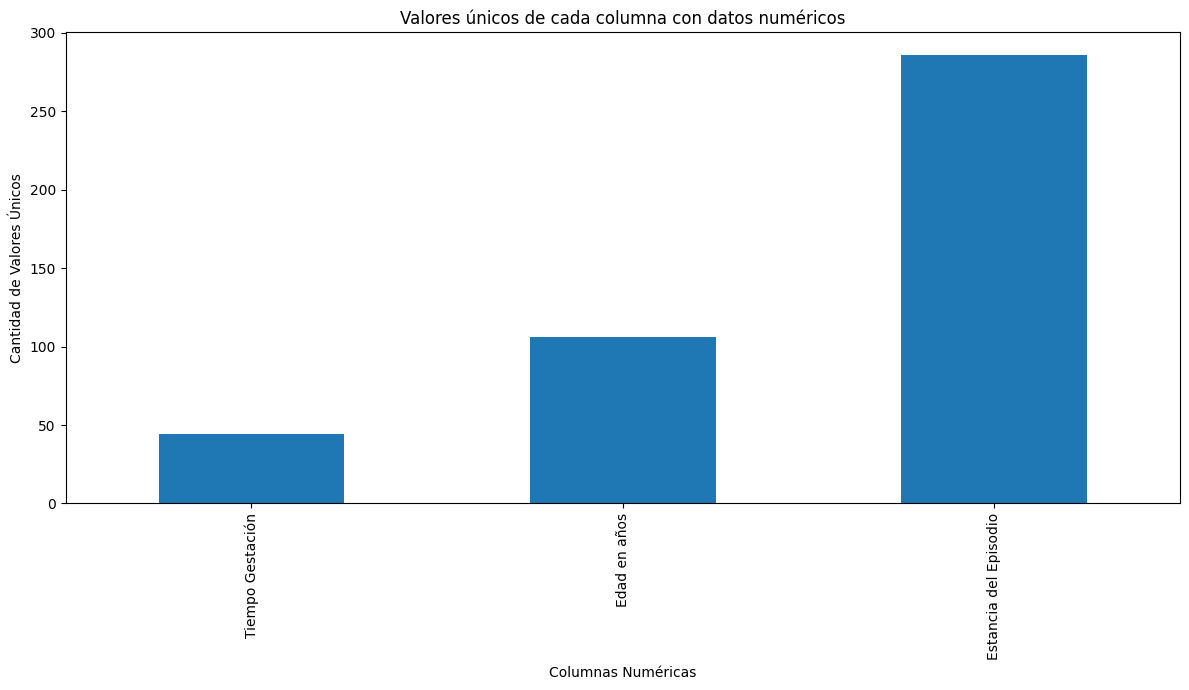

In [8]:
# Se obtiene el total de entradas únicas para cada columna numérica
unique_values = df_total.select_dtypes(include="number").nunique().sort_values()

# Se crea un gráfico de barras
ax = unique_values.plot.bar(figsize=(12, 7), title="Valores únicos de cada columna con datos numéricos")

# Se colocan etiquetas en los ejes del gráfico
ax.set_xlabel("Columnas Numéricas")
ax.set_ylabel("Cantidad de Valores Únicos")

# Se muestra el gráfico
plt.tight_layout()
plt.show()

###Observación de valores únicos en variables no numéricas

In [ ]:
# Se verifica la cantidad de categorias unicas para aquellas columnas no numéricas que no sean diagnósticos ni procedimientos
num_unique_values_sexo = df_total['Sexo (Desc)'].nunique()
num_unique_values_especialidad = df_total['Especialidad (Descripción )'].nunique()
num_unique_values_tipo_ingreso = df_total['Tipo Ingreso (Descripción)'].nunique()
num_unique_values_servicio_ingreso = df_total['Servicio Ingreso (Código)'].nunique()
print(f'Número de categorías únicas para Tipo Ingreso (Descripción): {num_unique_values_especialidad}')
print(f'Número de categorías únicas para Especialidad (Descripción ): {num_unique_values_tipo_ingreso}')
print(f'Número de categorías únicas para Servicio Ingreso (Código): {num_unique_values_servicio_ingreso}')
print(f'Número de categorías únicas para Sexo: {num_unique_values_sexo}')

Número de categorías únicas para Tipo Ingreso (Descripción): 47
Número de categorías únicas para Especialidad (Descripción ): 4
Número de categorías únicas para Servicio Ingreso (Código): 61
Número de categorías únicas para Sexo: 4


In [ ]:
# Se obtienen los distintos valores y su proporción en la columna 'Sexo (Desc)'
sexo_desc_counts = df_total['Sexo (Desc)'].value_counts(normalize=True)

# Se imprimen los valores y sus proporciones
print("Valores únicos en 'Sexo (Desc)':")
print(sexo_desc_counts)

Valores únicos en 'Sexo (Desc)':
Mujer                        0.596117
Hombre                       0.403867
Intersexo (Indeterminado)    0.000008
Desconocido                  0.000008
Name: Sexo (Desc), dtype: float64


In [ ]:
# Se cuenta el número de filas en 'Sexo (Desc)' con los valores especificados
intersexo_count = df_total[df_total['Sexo (Desc)'] == 'Intersexo (Indeterminado)'].shape[0]
desconocido_count = df_total[df_total['Sexo (Desc)'] == 'Desconocido'].shape[0]

# Se imprimen los valores y su cantidad
print(f"Total filas Intersexo (Indeterminado): {intersexo_count}")
print(f"Total filas Desconocido: {desconocido_count}")

Total filas Intersexo (Indeterminado): 1
Total filas Desconocido: 1


**Observaciones:** Al analizar la cantidad de valores únicos en columnas no numéricas, se notó que la columna 'Sexo (Desc)' contaba con 4. Al revisarlo con mayor detalle, se encontraron dos valores atípicos: `Intersexo (Indeterminado)` y `Desconocido`, los cuales solo se encontraban mencionados en una fila cada uno. Se tomó nota de esto, para implementar correcciones en la fase de preprocesamiento.

### Búsqueda y observación de errores (valores faltantes o duplicados)

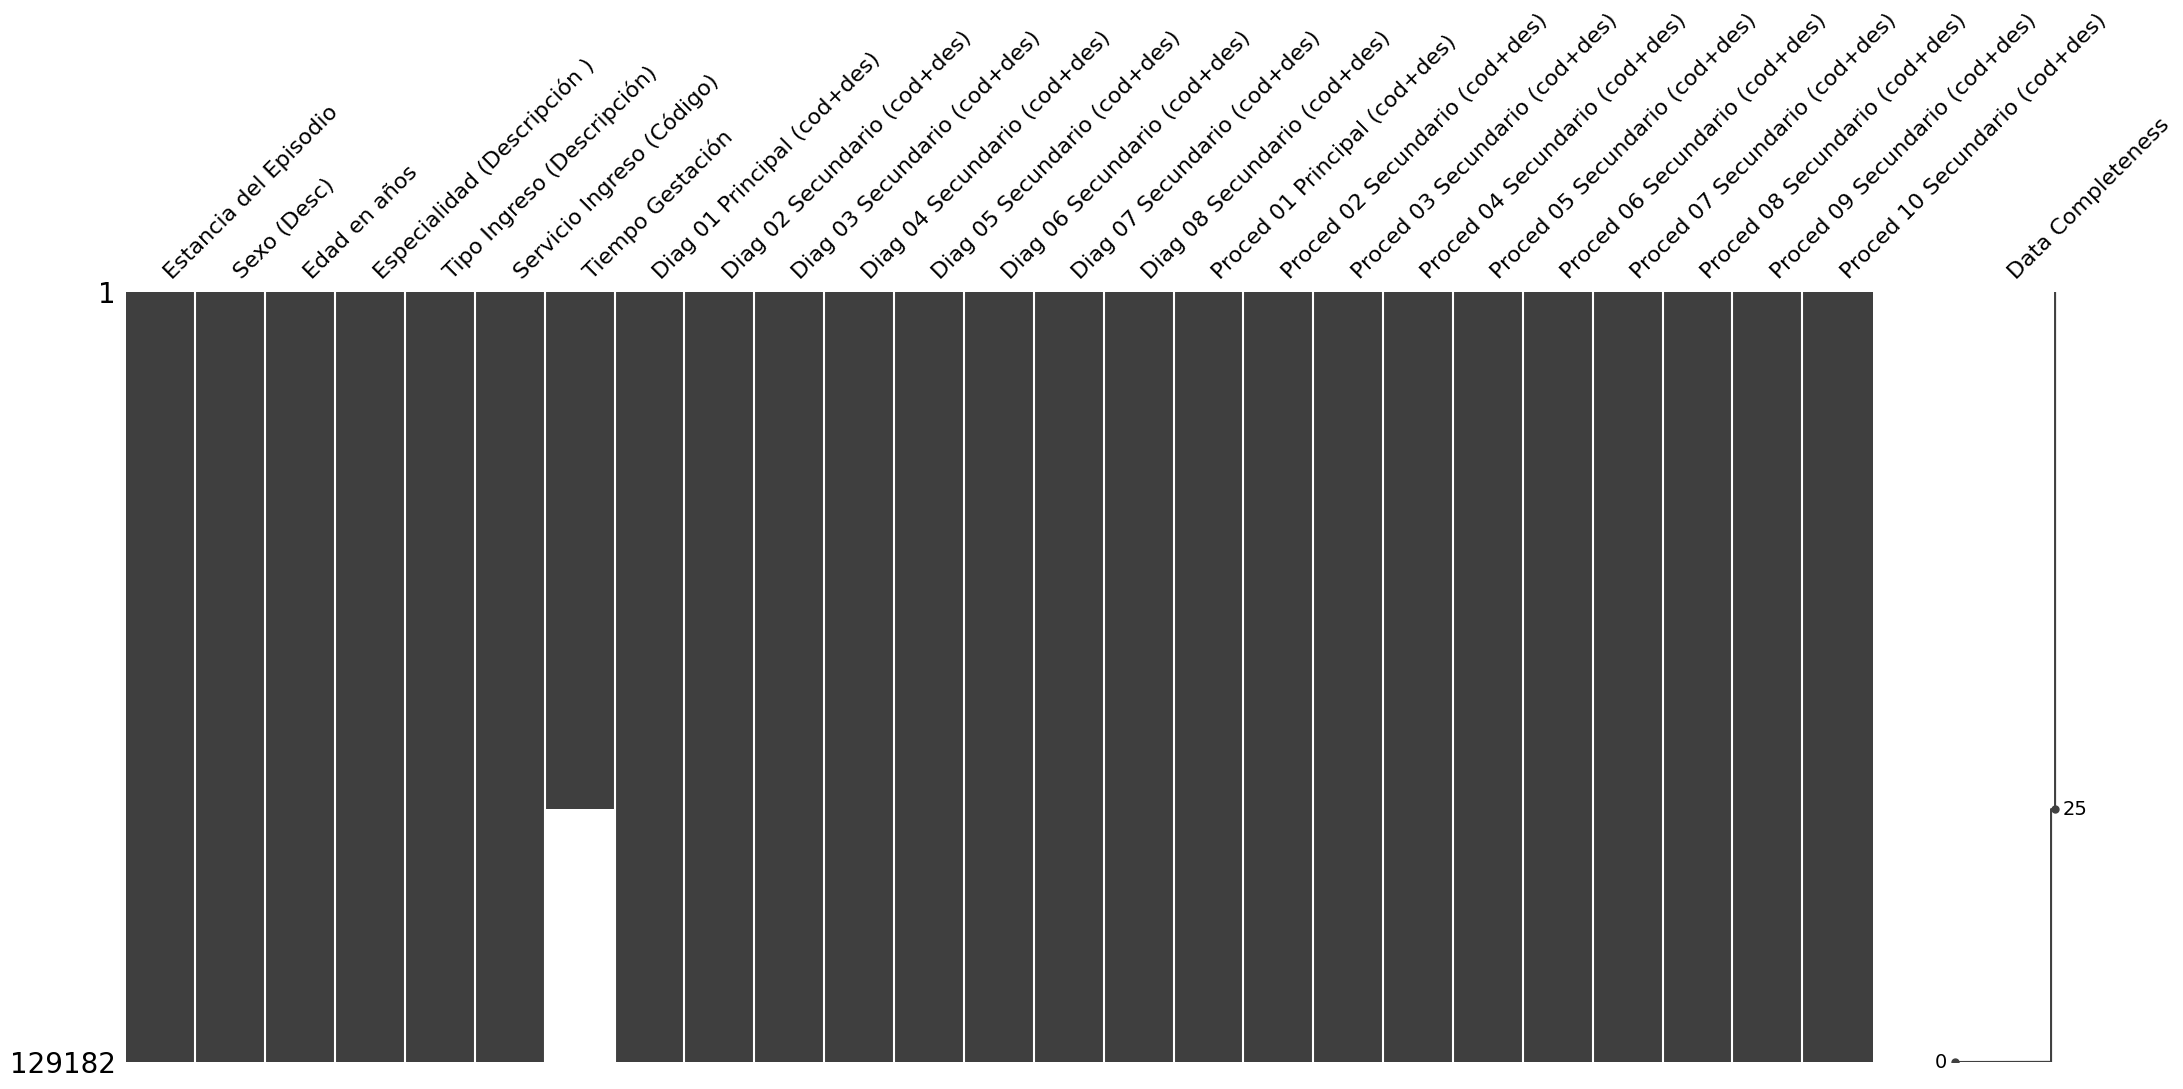

In [ ]:
# Se visualizan los datos faltantes utilizando la librería 'missingno'
msno.matrix(df_total, labels=True, sort="descending");


**Observaciones:** Utilizando la librería `missingno`, se visualizó la completitud de los datos por columna a través de un gráfico de barras. Se pudo apreciar que la columna 'Tiempo Gestación' es la única que cuenta con valores faltantes.

In [ ]:
# Se ajustan las opciones de visualización para que muestre todas las filas
pd.set_option('display.max_rows', None)

# Se calcula el total de datos faltantes por columna
missing_data = df_total.isnull().sum()
missing_data = missing_data[missing_data > 0]  # Filtra solo las columnas con datos faltantes

# Se calcula el porcentaje de datos faltantes por columna
missing_percentage = (df_total.isnull().sum() / len(df_total)) * 100
missing_percentage = missing_percentage[missing_percentage > 0]  # Filtra solo las columnas con datos faltantes

# Se crea un dataframe para mostrar ambos, el total y el porcentaje de datos faltantes
missing_info = pd.DataFrame({'Total missing': missing_data, 'Percentage missing (%)': missing_percentage})

print(missing_info)

# Se restauran las opciones de visualización originales
pd.reset_option('display.max_rows')

                                Total missing  Percentage missing (%)
Estancia del Episodio                       1                0.000774
Sexo (Desc)                                 1                0.000774
Edad en años                                1                0.000774
Especialidad (Descripción )                 1                0.000774
Tipo Ingreso (Descripción)                  1                0.000774
Servicio Ingreso (Código)                   1                0.000774
Tiempo Gestación                        42422               32.838940
Diag 01 Principal (cod+des)                 1                0.000774
Diag 02 Secundario (cod+des)                1                0.000774
Diag 03 Secundario (cod+des)                1                0.000774
Diag 04 Secundario (cod+des)                1                0.000774
Diag 05 Secundario (cod+des)                1                0.000774
Diag 06 Secundario (cod+des)                1                0.000774
Diag 07 Secundario (

**Observaciones:** Al ver en más detalle la cantidad y porcentaje de valores faltantes en la columna 'Tiempo Gestación', se descubrió que no solo esta columna contaba con datos faltantes, si no que a cada columna le faltaba exactamente 1. Se tomó nota de esto, para implementar correcciones en la fase de preprocesamiento.

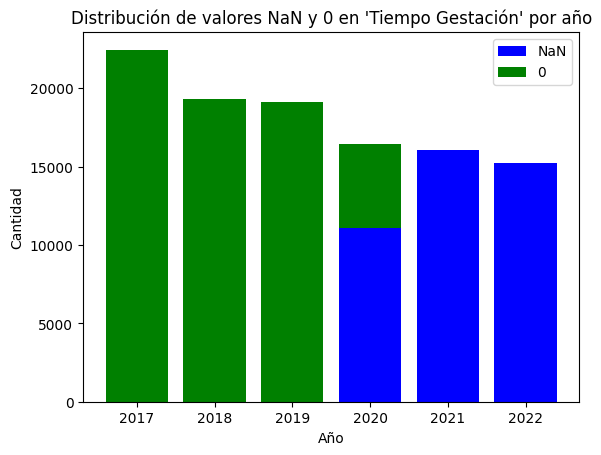

In [ ]:
# Se vuelven a cargar y leer los conjuntos de datos individuales, esta vez se guardan por separado
file_path = f'./Base 2017.xlsx'
df1 = pd.read_excel(file_path)
file_path = f'./Base 2018.xlsx'
df2 = pd.read_excel(file_path)
file_path = f'./Base 2019.xlsx'
df3 = pd.read_excel(file_path)
file_path = f'./Base 2020.xlsx'
df4 = pd.read_excel(file_path)
file_path = f'./Base 2021.xlsx'
df5 = pd.read_excel(file_path)
file_path = f'./Base 2022.xlsx'
df6 = pd.read_excel(file_path)

# Se agrega una columna 'Año' a cada dataframe, según le corresponda
df1['Año'] = 2017
df2['Año'] = 2018
df3['Año'] = 2019
df4['Año'] = 2020
df5['Año'] = 2021
df6['Año'] = 2022

# Se concatenan los dataframes con esta nueva columna
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

# Se crean columnas indicadoras para valores NaN y 0 en "Tiempo Gestación"
df['Es_NaN'] = df['Tiempo Gestación'].isna().astype(int)
df['Es_Cero'] = (df['Tiempo Gestación'] == 0).astype(int)

# Se agrupa por año y se suman las columnas indicadoras
df_grouped = df.groupby('Año')[['Es_NaN', 'Es_Cero']].sum().reset_index()

# Se grafica la distribución de los valores faltantes en 'Tiempo Gestación' a lo largo de los años
years = df_grouped['Año']
nan_values = df_grouped['Es_NaN']
zero_values = df_grouped['Es_Cero']

# Se crea una gráfica de barras apiladas
plt.bar(years, nan_values, label='NaN', color='blue')
plt.bar(years, zero_values, bottom=nan_values, label='0', color='green')

# Se agrega título y etiquetas
plt.title("Distribución de valores NaN y 0 en 'Tiempo Gestación' por año")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.legend()

# Se muestra la gráfica
plt.show()

**Observaciones:** Para investigar el por qué de la cantidad de datos faltantes en la columna 'Tiempo Gestación', se graficó la distribución de valores `NaN (no numéricos)` y `0 (cero)` en los datasets individuales a través de los años. A partir de esto, se concluyó que desde el año 2020 se cambió la manera en la que se registraba un tiempo de gestación inexistente, pasando de cero a NaN. Se tomó nota de esto, para implementar correcciones en la fase de preprocesamiento.

In [ ]:
# Se busca el número de entradas duplicadas
n_duplicates = df_total.duplicated().sum()
print(f"Hay {n_duplicates} duplicados.")

Hay 681 duplicados.


### Visualización de variables mediante gráficos

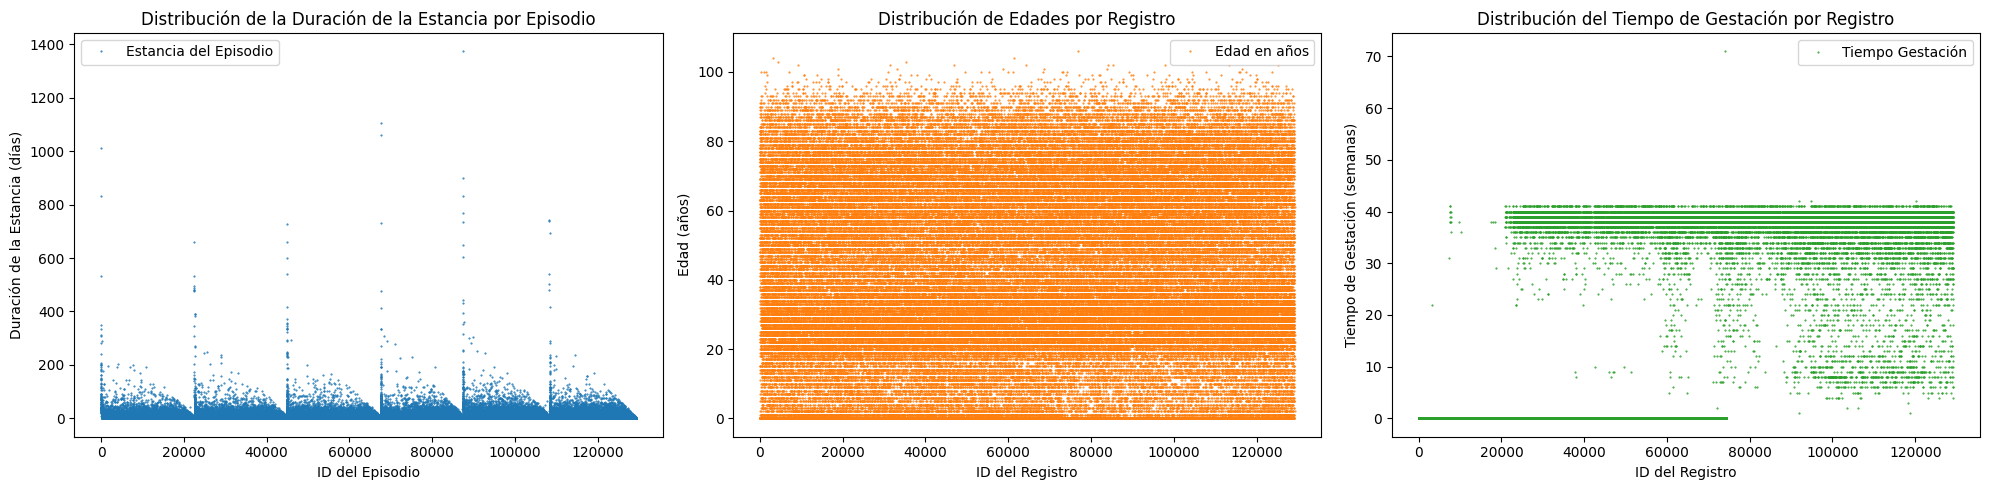

In [ ]:
# Se hace un gráfico de dispersión para cada variable numérica
axes = df_total.plot(lw=0,
                     marker=".",
                     subplots=True,
                     layout=(1, 3),
                     figsize=(20, 5),
                     markersize=1,
                     title=['Distribución de la Duración de la Estancia por Episodio',
                            'Distribución de Edades por Registro',
                            'Distribución del Tiempo de Gestación por Registro'])

# Se asignan etiquetas al eje X y al eje Y de cada gráfico
axes[0, 0].set_xlabel('ID del Episodio')
axes[0, 0].set_ylabel('Duración de la Estancia (días)')

axes[0, 1].set_xlabel('ID del Registro')
axes[0, 1].set_ylabel('Edad (años)')

axes[0, 2].set_xlabel('ID del Registro')
axes[0, 2].set_ylabel('Tiempo de Gestación (semanas)')

# Se muestran los gráficos
plt.tight_layout()

**Observaciones:** A partir de los gráficos de dispersión anteriores, se obtuvo la siguiente información:

- En el gráfico de la variable 'Estancia del Episodio', se observa que la mayor concentración de datos se encuentra en valores cercanos a cero, con una distribución sesgada a la derecha. Existen algunos picos en los que se vuelve a cero, esto se debe a que se trata de la información unificada de los distintos dataframes individuales. También se logran apreciar algunos *outliers* que superan los 1000 días de estancia, pero no son comunes.
- En el gráfico de la variable 'Edad en años', se observan múltiples líneas horizontales, esto debido a que se trata de números enteros, la distribución es uniforme entre todos los años.
- En el gráfico de la variable 'Tiempo Gestación', se observa un comportamiento similar al de 'Edad en años', con la diferencia de que la mayor concentración de datos se encuentra en 0 y 40. Dada esta distribución, se concluye de que la variable representa semanas.

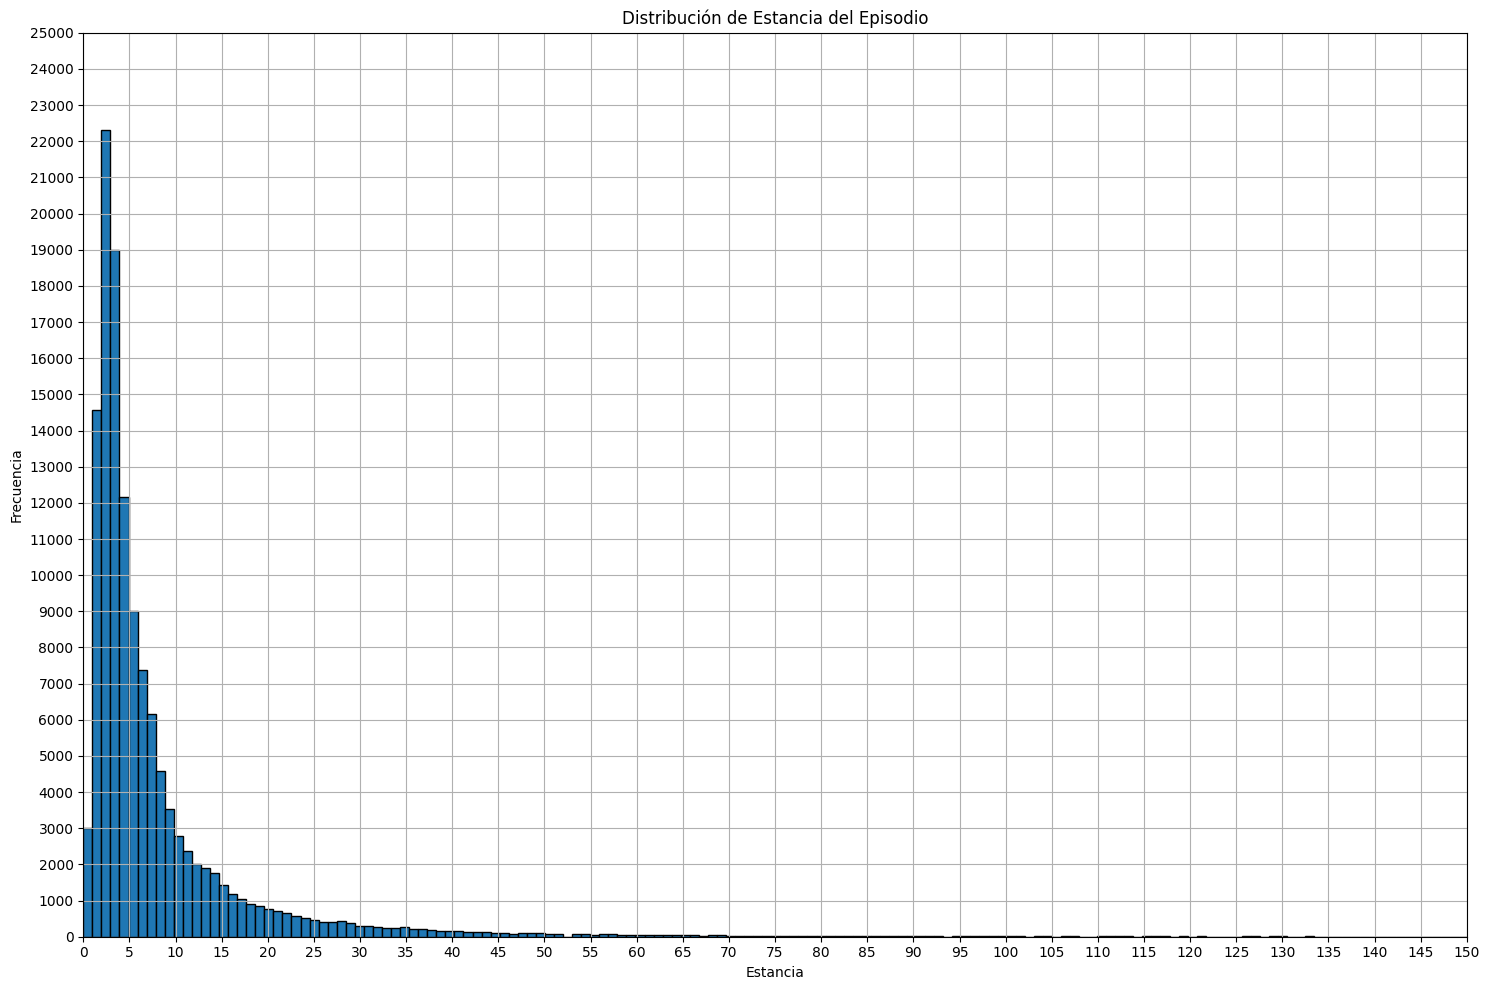

In [ ]:
# Se crea un histograma que muestra la distribución de la variable 'Estancia del Episodio' (menos detallado)
plt.figure(figsize=(15, 10))
df_total['Estancia del Episodio'].hist(bins=1400, edgecolor="black")
plt.title("Distribución de Estancia del Episodio")
plt.xlabel("Estancia")
plt.ylabel("Frecuencia")
plt.xticks(range(0, 151, 5))
plt.xlim([0, 150])
plt.yticks(range(0, 25001, 1000))
plt.ylim([0, 25000])
plt.tight_layout()
plt.show()

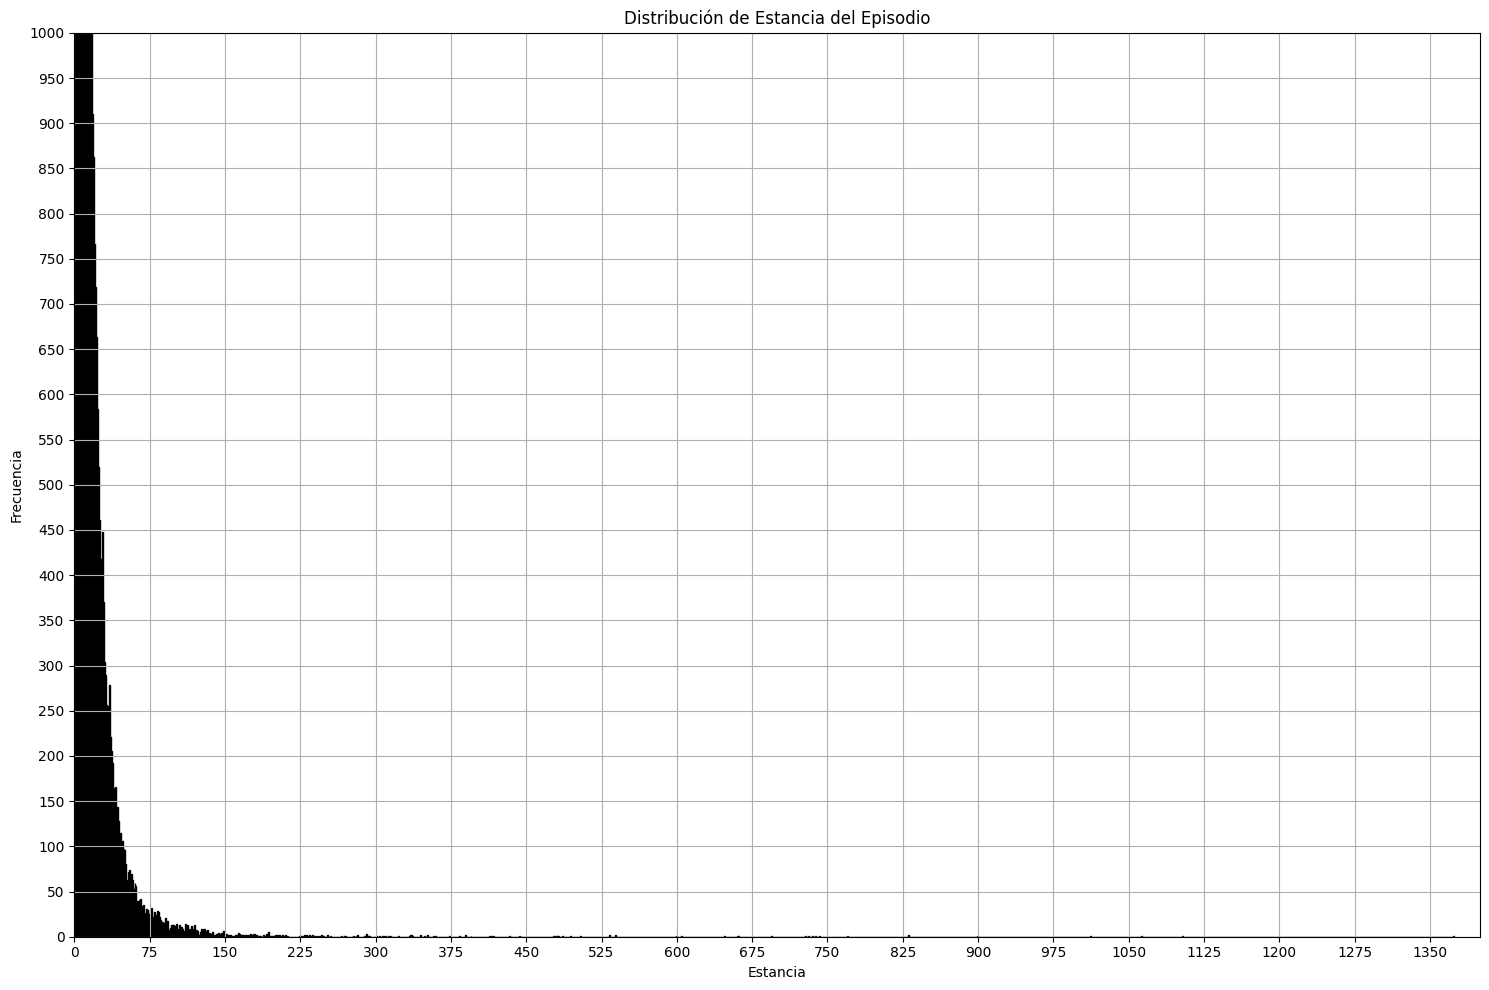

In [ ]:
# Se crea un histograma que muestra la distribución de la variable 'Estancia del Episodio' (más detallado)
plt.figure(figsize=(15, 10))
df_total['Estancia del Episodio'].hist(bins=1400, edgecolor="black")
plt.title("Distribución de Estancia del Episodio")
plt.xlabel("Estancia")
plt.ylabel("Frecuencia")
plt.xticks(range(0, 1401, 75))
plt.xlim([0, 1400])
plt.yticks(range(0, 1001, 50))
plt.ylim([0, 1000])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


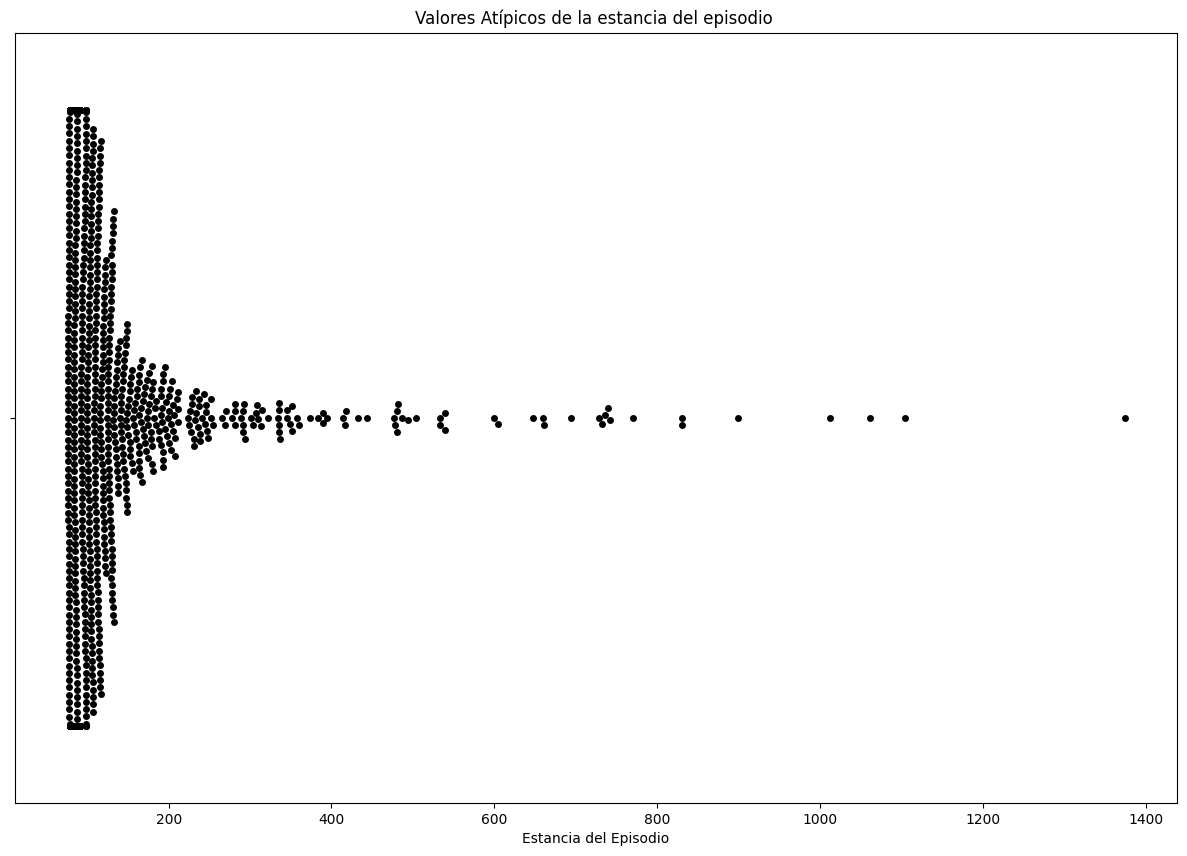

In [ ]:
# Se crea un swarmplot para visualizar valores atípicos en la variable 'Estancia del Episodio'
df_outliers = df_total[df_total['Estancia del Episodio'] > 75]

plt.figure(figsize=(15, 10))
sns.swarmplot(x=df_outliers['Estancia del Episodio'], color='black')
plt.title('Valores Atípicos de la estancia del episodio ')
plt.show()

In [ ]:
# Se imprime la mayor frecuencia y el mayor valor existente en la variable 'Estancia del Episodio' (outlier)
max_freq_estancia = df_total['Estancia del Episodio'].value_counts().max()
max_estancia = df_total['Estancia del Episodio'].max()
print(f"Frecuencia máxima: {max_freq_estancia}")
print(f"Valor máximo: {max_estancia}")

22301
1374.0


**Observaciones:** En los histogramas de la variable 'Estancia del Episodio', se logra observar un sesgo importante de los datos, encontrándose la mayor cantidad de estos concentrados entre 0 y 5. Se pueden apreciar algunos *outliers* que superan los 100 días de estancia, pero mientras más incrementa la duración del episodio, menor es la frecuencia con la que se produce. Se tomó nota de esto, para ser considerado durante la fase de preprocesamiento.

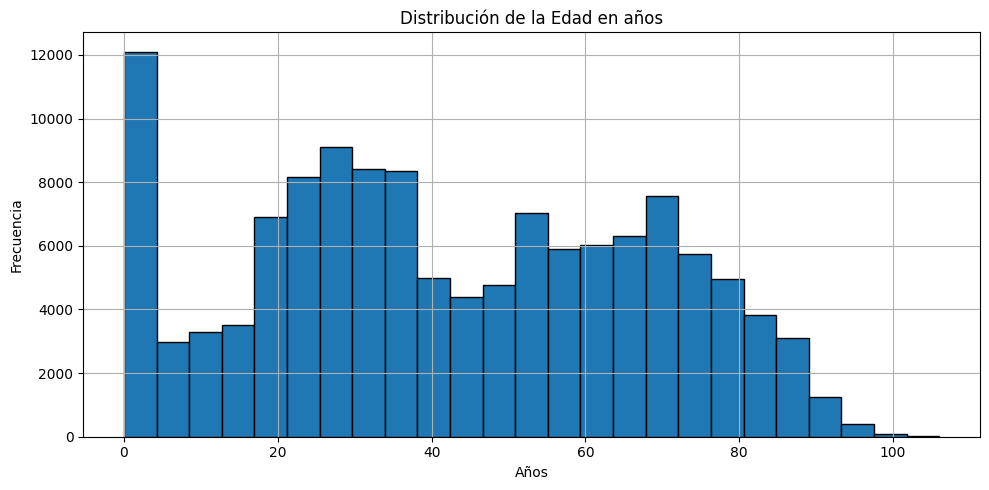

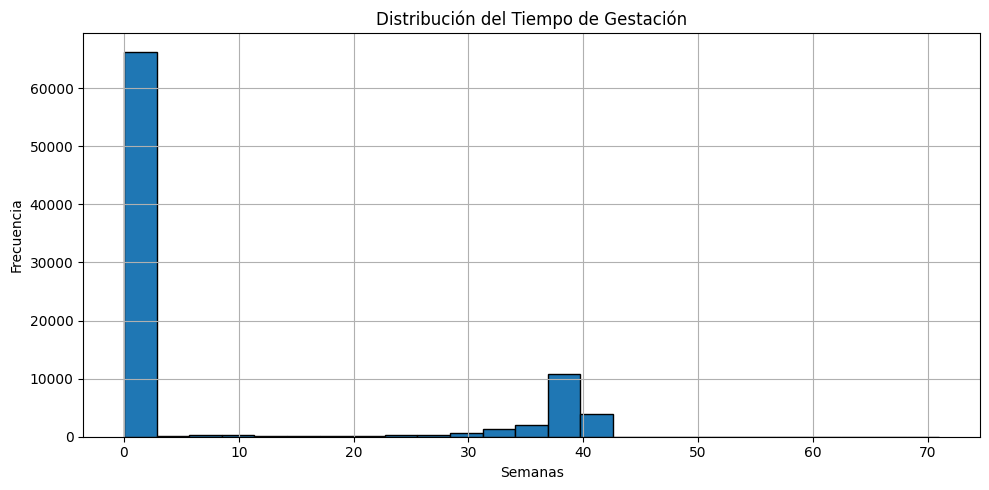

In [ ]:
# Se crean dos histogramas, uno que muestra la distribución de la variable 'Edad en años' y otro la de 'Tiempo Gestación'
plt.figure(figsize=(10, 5))
df_total['Edad en años'].hist(bins=25, edgecolor="black")
plt.title("Distribución de la Edad en años")
plt.xlabel("Años")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
df_total['Tiempo Gestación'].hist(bins=25, edgecolor="black")
plt.title("Distribución del Tiempo de Gestación")
plt.xlabel("Semanas")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

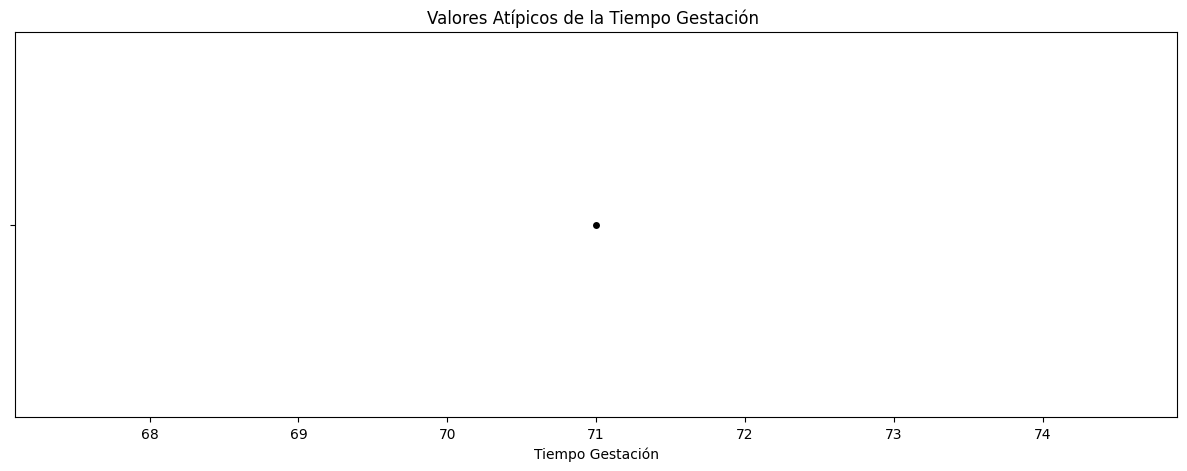

In [ ]:
# Se crea un swarmplot para visualizar valores atípicos en la variable 'Tiempo Gestación'
df_outliers = df_total[df_total['Tiempo Gestación'] > 42]

plt.figure(figsize=(15, 5))
sns.swarmplot(x=df_outliers['Tiempo Gestación'], color='black')
plt.title('Valores Atípicos de la Tiempo Gestación ')
plt.show()

In [ ]:
# Se imprime la mayor frecuencia y el mayor valor existente en la variable 'Tiempo Gestación' (outlier)
max_freq_estancia = df_total['Tiempo Gestación'].value_counts().max()
max_estancia = df_total['Tiempo Gestación'].max()
print(f"Frecuencia máxima: {max_freq_estancia}")
print(f"Frecuencia máxima: {max_estancia}")

108629
71.0


In [ ]:
# Se imprime la mayor frecuencia y el mayor valor existente en la variable 'Edad en años' (outlier)
max_freq_estancia = df_total['Edad en años'].value_counts().max()
max_estancia = df_total['Edad en años'].max()
print(f"Frecuencia máxima: {max_freq_estancia}")
print(f"Valor máximo: {max_estancia}")

7763
106.0


**Observaciones:** En los histogramas de las variables 'Edad en años' y 'Tiempo Gestación', no se apreció mucho más de lo que ya se había identificado en los gráficos de distribución. Los puntos más destacables son la gran concentración de edades con valores iguales a cero y un único *outlier* que fue descubierto en 'Tiempo Gestación'. Se tomó nota de esto, para ser considerado durante la fase de preprocesamiento.

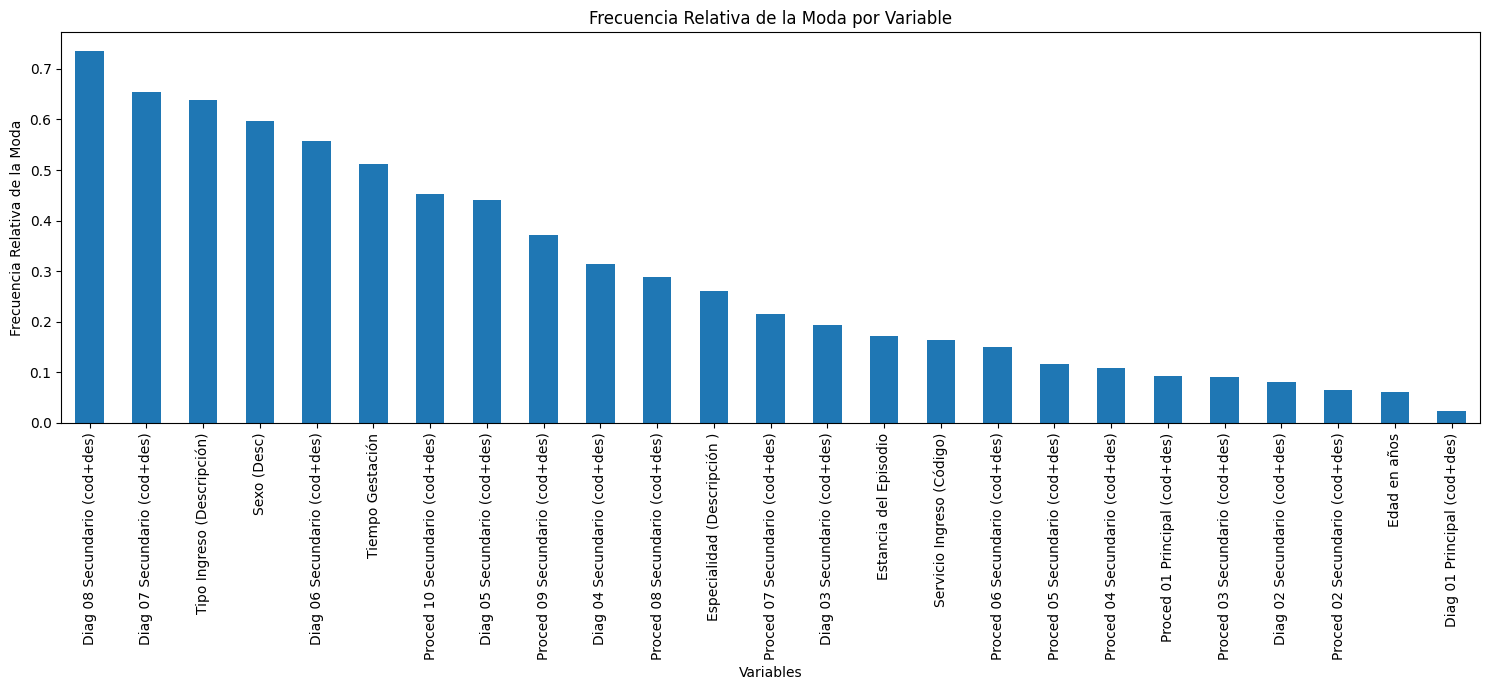

In [ ]:
# Se consigue la entrada que más se repite para cada columna
most_frequent_entry = df_total.mode()

# Se utiliza 'iloc' para dejar solo la primera aparición de cada moda y omitir las repetidas
first_mode = most_frequent_entry.iloc[0]

# Se revisa en cada columna si se encuentra la entrada más frecuente
df_freq = df_total.eq(first_mode, axis=1)

# Se calcula la media de las entradas más frecuentes
df_freq = df_freq.mean().sort_values(ascending=False)

# Se muestra el gráfico de barras 'df_freq'
ax = df_freq.plot.bar(figsize=(15, 7))

# Se establecen el título del gráfico y las etiquetas de sus ejes
ax.set_title('Frecuencia Relativa de la Moda por Variable')
ax.set_xlabel('Variables')
ax.set_ylabel('Frecuencia Relativa de la Moda')

# Se muestra el gráfico
plt.tight_layout()
plt.show()

**Observaciones:** En este gráfico se presenta la frecuencia relativa de la moda en las distintas variables del dataframe, es decir, se puede determinar a partir de él, el porcentaje en el cual se encuentra presente el valor más frecuente en comparación con la cantidad total de datos.

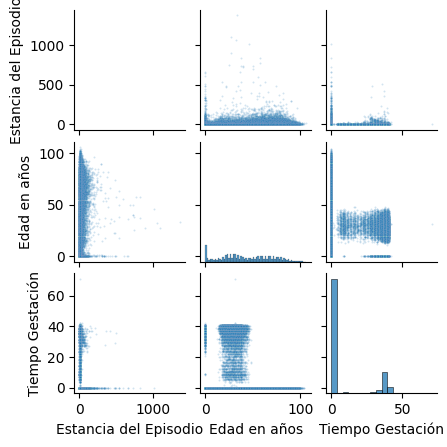

In [ ]:
# Se identifican las columnas con al menos 25 valores numéricos únicos entre sus entradas
cols_continuous = df_total.select_dtypes(include="number").nunique() >= 25

# Se crea un dataframe nuevo con las columnas obtenidas
df_continuous = df_total[cols_continuous[cols_continuous].index]
df_continuous.shape

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

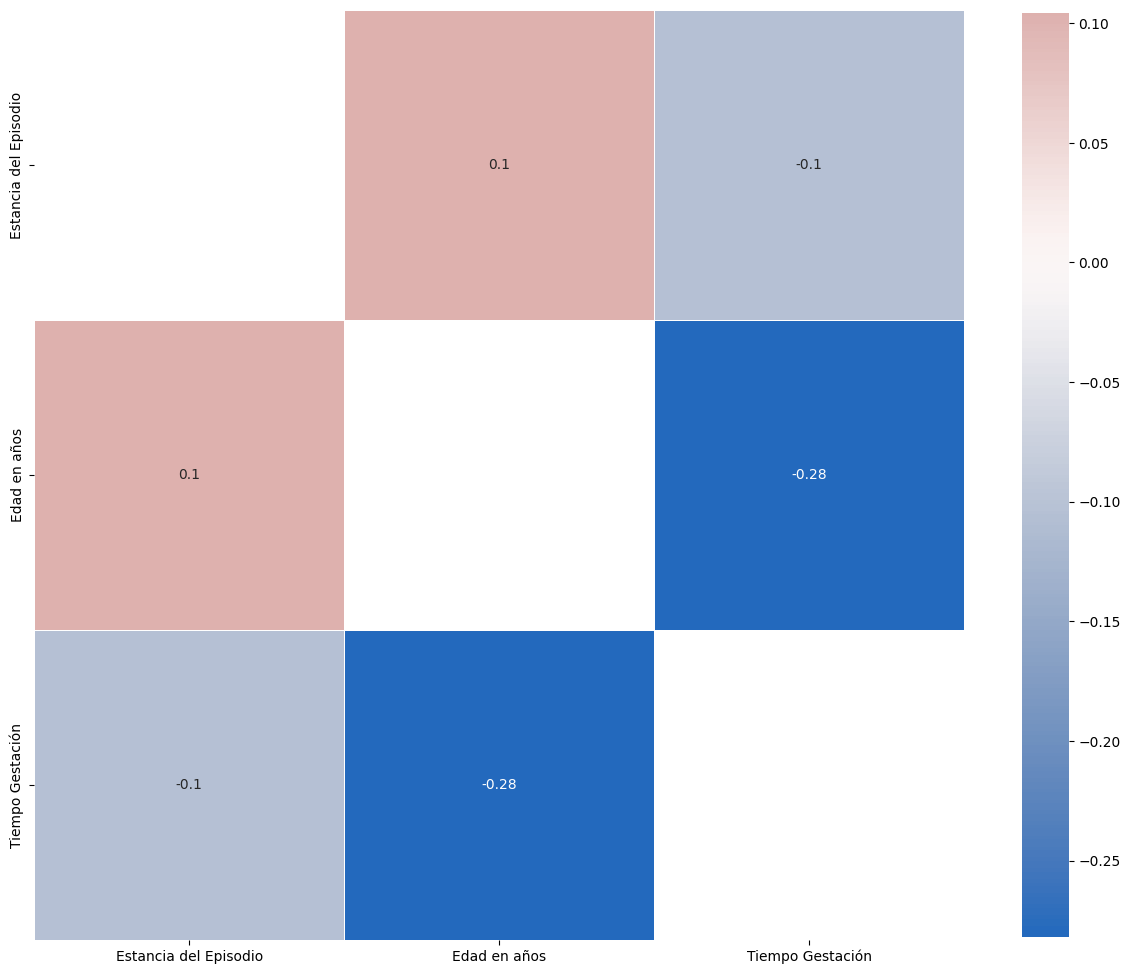

In [ ]:
# Se crea una matriz de correlación utilizando el método de Pearson
df_numeric = df_total.select_dtypes(include=[np.number])
df_corr = df_numeric.corr(method="pearson")

# Se grafica la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=True, linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

plt.show()

**Observaciones:** Se realizaron algunos gráficos y comparaciones adicionales para las variables numéricas, para ver si existía algún tipo de relación directa entre ellas. Debido a la baja cantidad de variables numéricas en el dataframe actual (3/25), la mayoría de gráficos no aporta mucha luz sobre la relación entre variables. Se tomó nota de esto, para ser considerado durante la fase de preprocesamiento.

## 3. Exportación del Dataframe Unificado

En esta sección, utilizaremos los datos combinados de los distintos conjuntos de datos individuales para crear un único dataframe, el cual exportaremos para que sirva de base en los procesos posteriores. Este dataframe incluye la nueva selección de datos realizada durante este notebook.

In [ ]:
# Se crea un archivo parquet con el dataframe como se dejó hasta el momento
ruta = './pronostico_estadia.parquet'
df_total.to_parquet(ruta, index=False)